In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data = pd.read_csv("../../../Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [4]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494),9031691463010
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872),13013231115200
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424),8005283365016
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916),7053577015200


In [5]:
data.Category.astype('category')

0           MISSING PERSON
1                 WARRANTS
2          SECONDARY CODES
3           OTHER OFFENSES
4          SECONDARY CODES
                ...       
2215019     MISSING PERSON
2215020      VEHICLE THEFT
2215021     OTHER OFFENSES
2215022      LARCENY/THEFT
2215023     OTHER OFFENSES
Name: Category, Length: 2215024, dtype: category
Categories (39, object): [ARSON, ASSAULT, BAD CHECKS, BRIBERY, ..., VANDALISM, VEHICLE THEFT, WARRANTS, WEAPON LAWS]

### Report the total number of crimes in the dataset

In [6]:
len(data.IncidntNum.unique())

1746914

### List the various categories of crime

In [7]:
data.Category.unique()

array(['MISSING PERSON', 'WARRANTS', 'SECONDARY CODES', 'OTHER OFFENSES',
       'LARCENY/THEFT', 'FORGERY/COUNTERFEITING', 'ASSAULT',
       'DRUG/NARCOTIC', 'NON-CRIMINAL', 'BURGLARY', 'VANDALISM',
       'DRUNKENNESS', 'ROBBERY', 'VEHICLE THEFT', 'KIDNAPPING', 'FRAUD',
       'PROSTITUTION', 'DISORDERLY CONDUCT', 'STOLEN PROPERTY',
       'RECOVERED VEHICLE', 'LIQUOR LAWS', 'WEAPON LAWS',
       'SUSPICIOUS OCC', 'TRESPASS', 'EMBEZZLEMENT', 'RUNAWAY',
       'DRIVING UNDER THE INFLUENCE', 'SEX OFFENSES, FORCIBLE',
       'BAD CHECKS', 'SEX OFFENSES, NON FORCIBLE', 'SUICIDE',
       'FAMILY OFFENSES', 'ARSON', 'LOITERING', 'GAMBLING', 'BRIBERY',
       'EXTORTION', 'PORNOGRAPHY/OBSCENE MAT', 'TREA'], dtype=object)

In [8]:
len(data.Category.unique())

39

### List the number of crimes in each category

In [9]:
data.groupby('Category').count()['IncidntNum']

Category
ARSON                            3931
ASSAULT                        194694
BAD CHECKS                        925
BRIBERY                           813
BURGLARY                        91543
DISORDERLY CONDUCT              10040
DRIVING UNDER THE INFLUENCE      5672
DRUG/NARCOTIC                  119628
DRUNKENNESS                      9826
EMBEZZLEMENT                     2988
EXTORTION                         741
FAMILY OFFENSES                  1183
FORGERY/COUNTERFEITING          23050
FRAUD                           41542
GAMBLING                          348
KIDNAPPING                       5346
LARCENY/THEFT                  480448
LIQUOR LAWS                      4083
LOITERING                        2430
MISSING PERSON                  64961
NON-CRIMINAL                   238323
OTHER OFFENSES                 309358
PORNOGRAPHY/OBSCENE MAT            59
PROSTITUTION                    16701
RECOVERED VEHICLE                8716
ROBBERY                         55867
RUN

### Now count the number of occurrences of each category in the dataset. What is the most commonly occurring category of crime? What is the least frequently occurring?

In [10]:
cat_inc = data.groupby('Category').count()['IncidntNum']

### Create a histogram over crime occurrences.

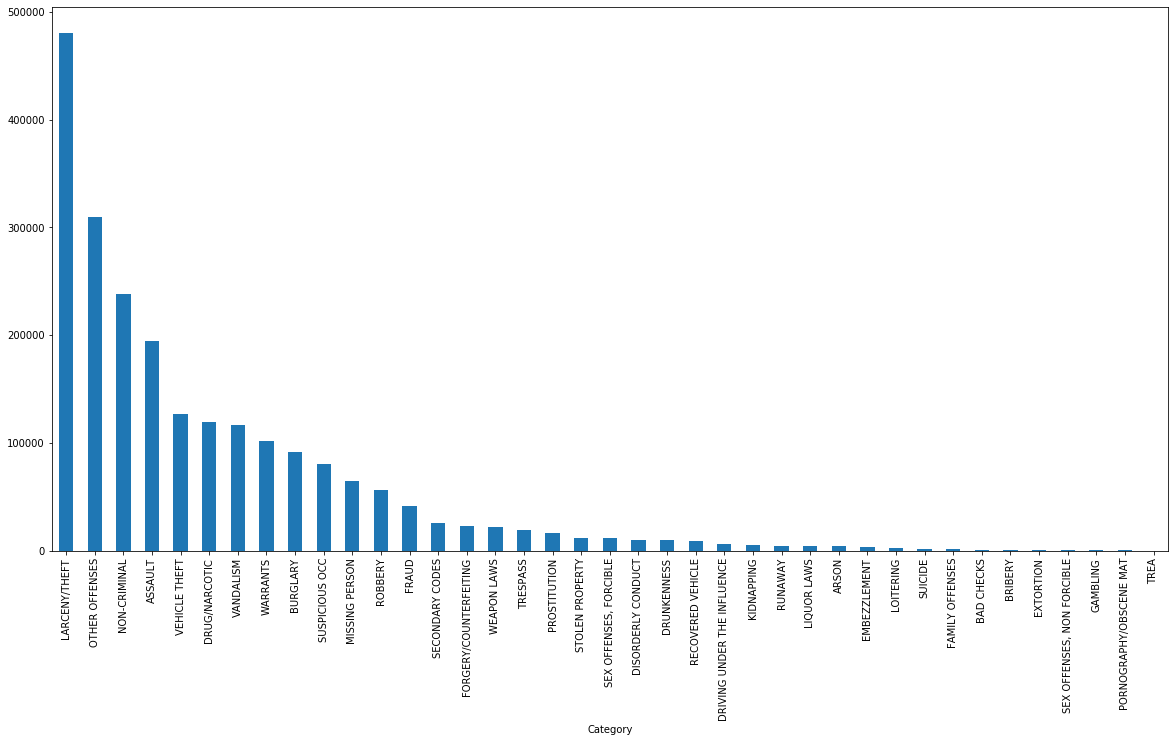

In [11]:
cat_inc.sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

### Now it's time to explore how the crime statistics change over time. To start off easily, let's count the number of crimes per year for the years 2003-2017 (since we don't have full data for 2018). What's the average number of crimes per year?

In [12]:
data.Date = pd.to_datetime(data.Date)

In [13]:
data[data.Date.dt.year != 2018][['Date','IncidntNum']].groupby(data.Date.dt.year).nunique()\
        .IncidntNum.mean()

114097.86666666667

### Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below (for convenient copy-paste action). Now create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.

In [14]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

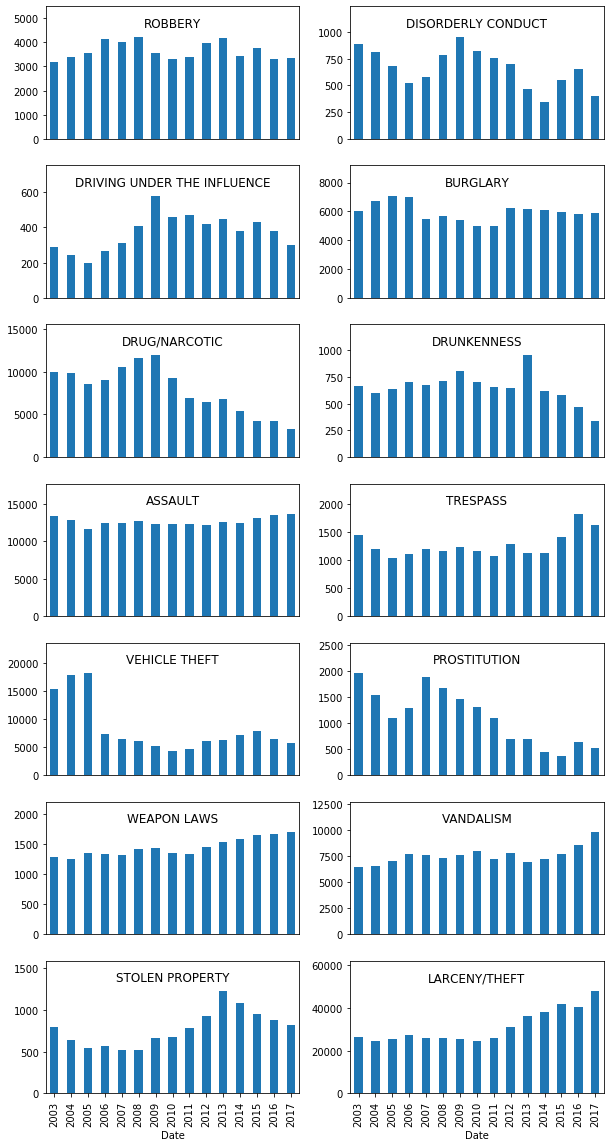

In [15]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
for i, crime in enumerate(focuscrimes):
    axi=axes[i%7, i%2]
    if i%7 != 6:
        axi.axes.get_xaxis().set_visible(False)
    axi.set_title(crime, y=0.80)
    axi.margins(y=0.3)
    data[(data.Date.dt.year != 2018) & (data.Category == crime)]\
    .groupby(data.Date.dt.year).count().IncidntNum\
    .plot(ax=axi, kind='bar')
    

### Now just count up what happens during each weekday

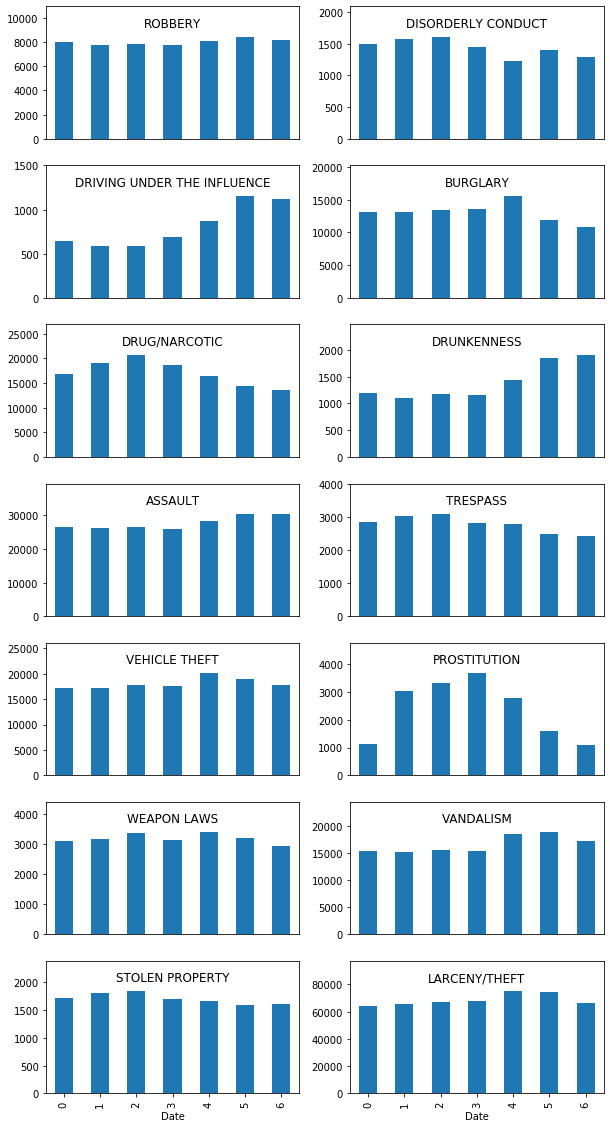

In [16]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
for i, crime in enumerate(focuscrimes):
    axi=axes[i%7, i%2]
    if i%7 != 6:
        axi.axes.get_xaxis().set_visible(False)
    axi.set_title(crime, y=0.80)
    axi.margins(y=0.3)
    data[(data.Category == crime)]\
    .groupby(data.Date.dt.dayofweek).count().IncidntNum\
    .plot(ax=axi, kind='bar')

#### The months. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec

In [17]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']

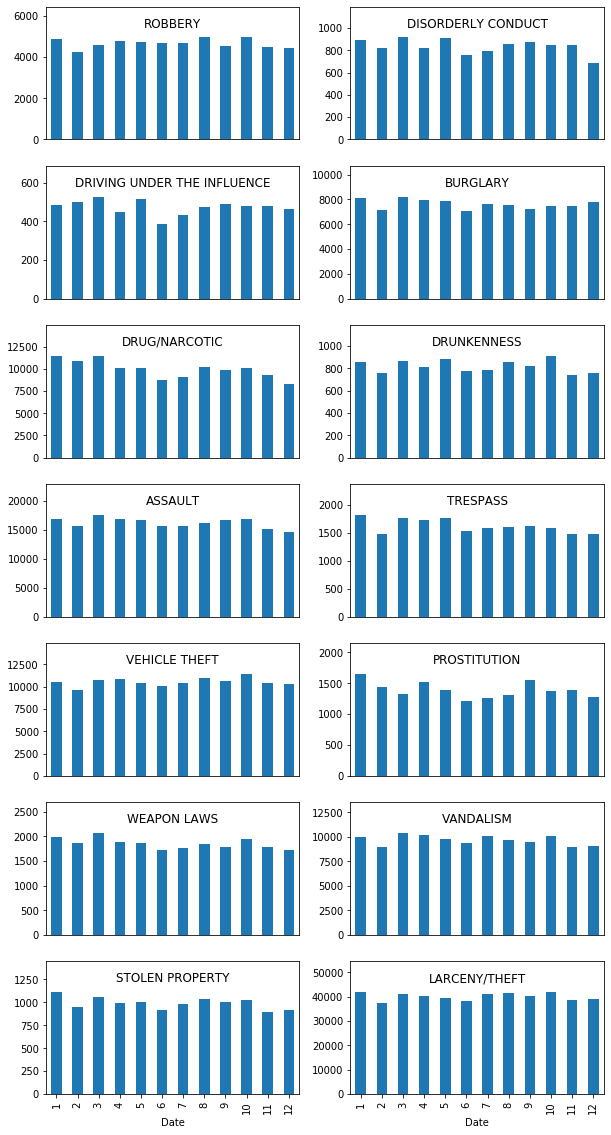

In [18]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
for i, crime in enumerate(focuscrimes):
    axi=axes[i%7, i%2]
    if i%7 != 6:
        axi.axes.get_xaxis().set_visible(False)
    #axi.set_xticklabels(months)
    axi.set_title(crime, y=0.80)
    axi.margins(y=0.3)
    data[(data.Category == crime)]\
    .groupby(data.Date.dt.month).count().IncidntNum\
    .plot(ax=axi, kind='bar')

There is a drop of crimes in the months of May and June for some categories. May be due to the fact that days are longer and brighter and this prevents some of these crimes from happening since they often happen at night

### The 24 hour cycle. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on.

In [19]:
data['Hour'] = pd.to_datetime(data.Time).dt.hour
data['DayOfWeek'] = data.Date.dt.dayofweek
data['Minutes'] = pd.to_datetime(data.Time).dt.minute

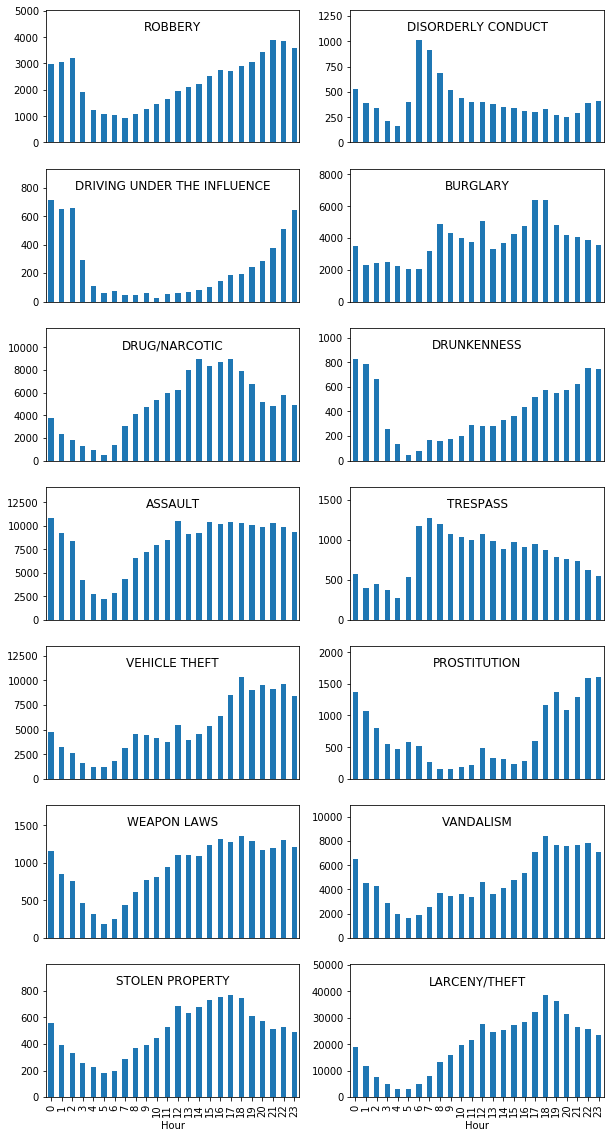

In [20]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
for i, crime in enumerate(focuscrimes):
    axi=axes[i%7, i%2]
    if i%7 != 6:
        axi.axes.get_xaxis().set_visible(False)
    #axi.set_xticklabels(months)
    axi.set_title(crime, y=0.80)
    axi.margins(y=0.3)
    data[(data.Category == crime)]\
    .groupby(data.Hour).count().IncidntNum\
    .plot(ax=axi, kind='bar')

As expected many crimes happen more frequently during night hours.
Disorderly conduct and Trespass are a slight exception to this
but it may be due to the fact that people tend to conduct in a disordered way
after early in the morning after being out the whole night

### Hours of the week. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

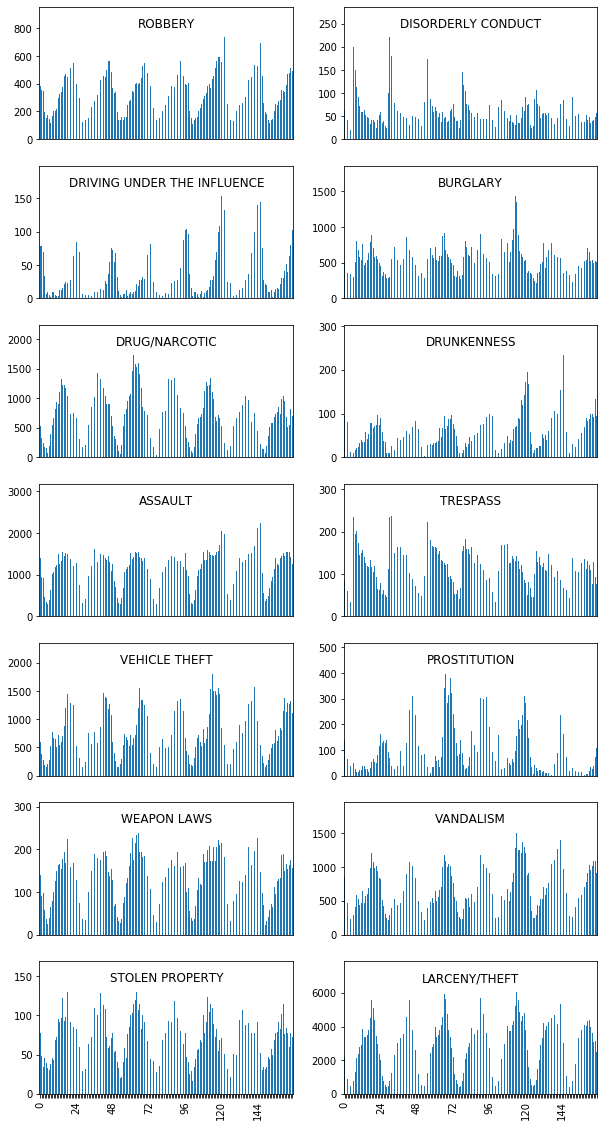

In [21]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
for i, crime in enumerate(focuscrimes):
    axi=axes[i%7, i%2]
    if i%7 != 6:
        axi.axes.get_xaxis().set_visible(False)
    axi.set_title(crime, y=0.80)
    axi.margins(y=0.3)
    d = data[(data.Category == crime)].groupby(['DayOfWeek','Hour'])\
        .count().IncidntNum.reset_index().IncidntNum
    d.plot(ax=axi, kind='bar')
    # Show only the beginning of the dat
    for i, t in enumerate(axi.get_xticklabels()):
        if (i % 24) != 0:
            t.set_visible(False)

#### First, simply list the names of SF's 10 police districts.

In [22]:
pddistricts = data.dropna().PdDistrict.unique()
pddistricts

array(['TARAVAL', 'SOUTHERN', 'PARK', 'MISSION', 'NORTHERN', 'BAYVIEW',
       'RICHMOND', 'CENTRAL', 'INGLESIDE', 'TENDERLOIN'], dtype=object)

#### Which has the most crimes?

In [23]:
data.groupby('PdDistrict').count().IncidntNum.idxmax()

'SOUTHERN'

#### Which has the most focus crimes?

In [24]:
data[(data.Category.isin(focuscrimes))].groupby('PdDistrict')\
    .count().IncidntNum.idxmax()

'SOUTHERN'

#### First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole

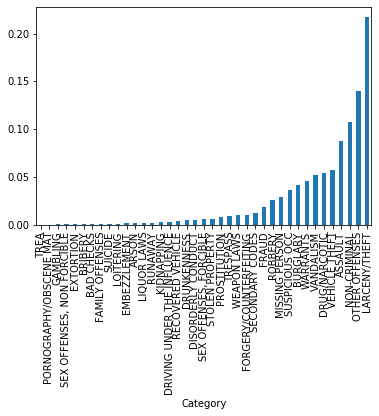

In [25]:
pcrime = (data.groupby('Category').count().IncidntNum / data.count().IncidntNum)
pcrime.sort_values().plot(kind='bar')

#### Next, we calculate that same probability distribution but for each PD district, let's call that P(crime|district)

In [26]:
distcat = data.groupby(['PdDistrict','Category']).count().IncidntNum

In [27]:
pcrimedist = {}
for dist in pddistricts:
    pcrimedist[dist] = distcat[dist]/distcat[dist].sum()

#### Now we look at the ratio P(crime|district)/P(crime). That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs more frequently within that district. If it's smaller than one, it means that the crime is rarer within the district in question than in the city as a whole.

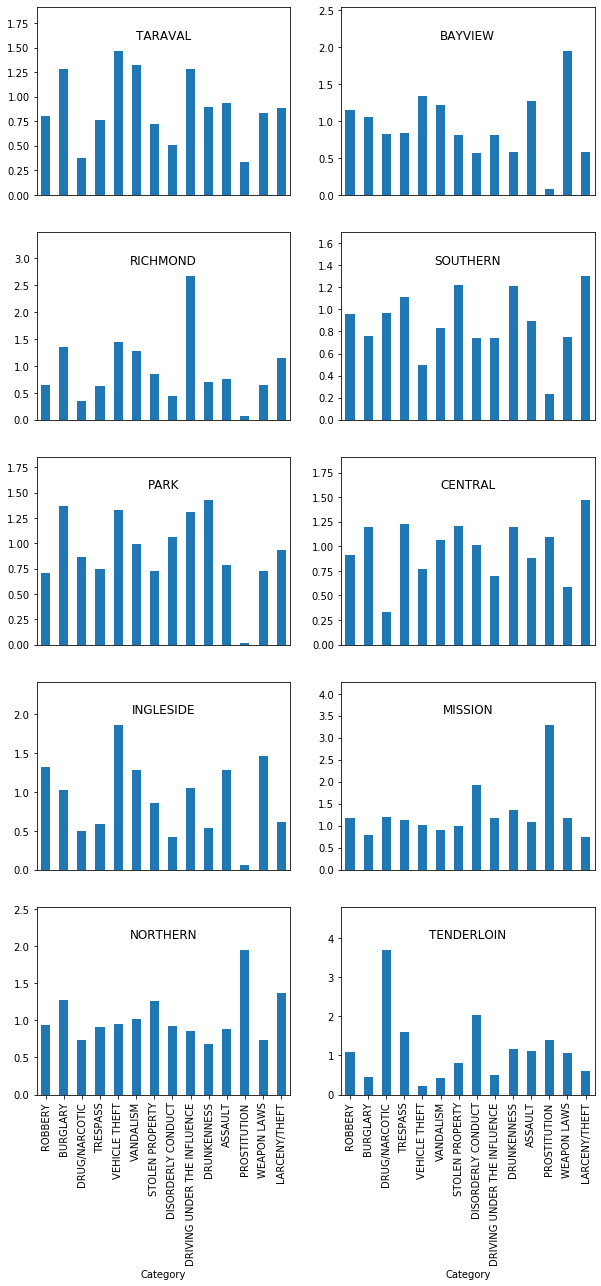

In [28]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,20))
for i, dist in enumerate(pddistricts):
    axi=axes[i%5, i%2]
    if i%5 != 4:
        axi.axes.get_xaxis().set_visible(False)
    #axi.set_xticklabels(months)
    axi.set_title(dist, y=0.80)
    axi.margins(y=0.3)
    (pcrimedist[dist].filter(focuscrimes)\
                      /pcrime.filter(focuscrimes))\
                      .plot(ax=axi, kind='bar')

### Excercise 4

In [29]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import urllib3
import json
import subprocess
%matplotlib inline
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [30]:
geojsonurl = "https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/sfpddistricts.geojson"

In [31]:
http = urllib3.PoolManager()
r = http.request('GET', geojsonurl)

/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [32]:
json = json.loads(r.data.decode('utf-8'))

#### There are a number of formats for geographical areas, and the article uses ShapeFiles, so you will have to convert GeoJSON (one geo-spatial file formate) to ShapeFiles (another geo-spatial file formate)

In [33]:
args = ['ogr2ogr', '-f', 'ESRI Shapefile', 'destination_data.shp', 'sfpddistricts.geojson']
subprocess.Popen(args)

In [34]:
shp_path = "./destination_data.shp"
sf = shp.Reader(shp_path)

Let's check how many different "shapes" were imported by our function shp.Reader

In [35]:
len(sf.shapes())

10

Let's also explore one of the shapes (or "records"):

In [36]:
sf.records()

[Record #0: [1, 'CENTRAL', 'A'],
 Record #1: [2, 'SOUTHERN', 'B'],
 Record #2: [3, 'BAYVIEW', 'C'],
 Record #3: [4, 'MISSION', 'D'],
 Record #4: [5, 'PARK', 'F'],
 Record #5: [6, 'RICHMOND', 'G'],
 Record #6: [7, 'INGLESIDE', 'H'],
 Record #7: [8, 'TARAVAL', 'I'],
 Record #8: [9, 'NORTHERN', 'E'],
 Record #9: [10, 'TENDERLOIN', 'J']]

Let's first create a usefull function to convert our 'shapefile' format on a more commun Pandas dataframe format:

In [37]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [38]:
df = read_shapefile(sf)
df.shape

(10, 4)

In [39]:
df

,OBJECTID,DISTRICT,COMPANY,coords
0,1,CENTRAL,A,"[(-122.40532134644249, 37.806867516866724), (-..."
1,2,SOUTHERN,B,"[(-122.38821894111335, 37.78999576746098), (-1..."
2,3,BAYVIEW,C,"[(-122.39341605532405, 37.708411637816816), (-..."
3,4,MISSION,D,"[(-122.40801677575325, 37.76940485786585), (-1..."
4,5,PARK,F,"[(-122.44665042193688, 37.77587626927481), (-1..."
5,6,RICHMOND,G,"[(-122.44804859574957, 37.78237035514554), (-1..."
6,7,INGLESIDE,H,"[(-122.40829932959814, 37.70833099837997), (-1..."
7,8,TARAVAL,I,"[(-122.45552143363692, 37.71098714310676), (-1..."
8,9,NORTHERN,E,"[(-122.44565177737462, 37.805366554058175), (-..."
9,10,TENDERLOIN,J,"[(-122.41794938068229, 37.786023295747746), (-..."


Create a function to plot it

In [40]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

(-122.41378829382472, 37.80472203449138)

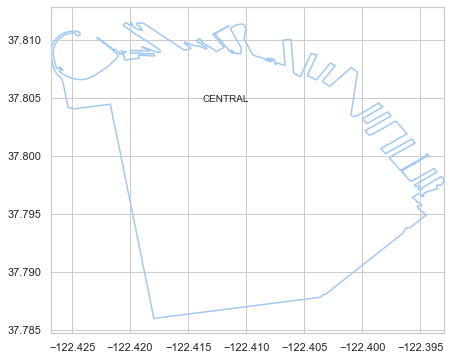

In [41]:
district = 'CENTRAL'
dis_id = df[df.DISTRICT == district].index.array[0]
plot_shape(dis_id, district)

Now, we must plot at same picture, all the shapes that are on our dataframe

In [42]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

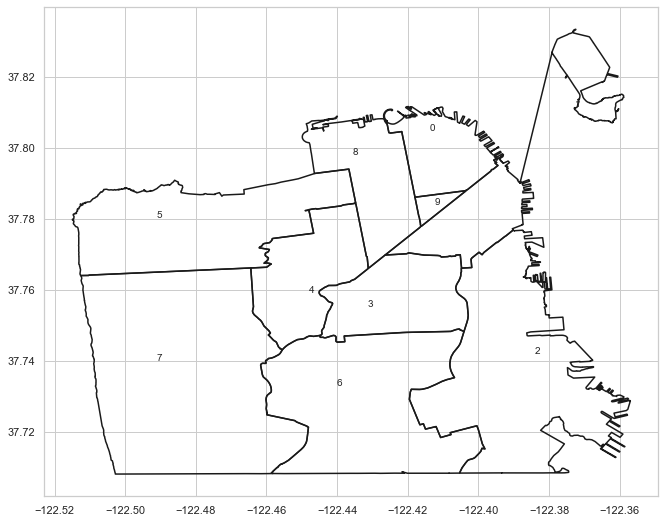

In [43]:
plot_map(sf)

We can "merge" the two previous functions and "plot" a single shape inside a full map

In [44]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

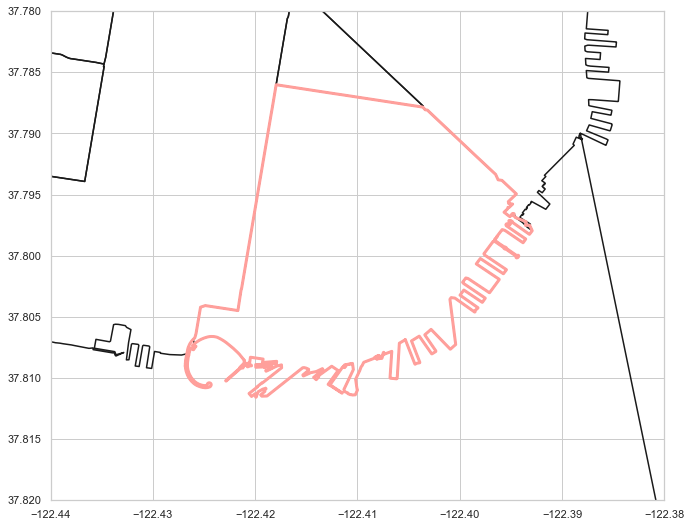

In [45]:
x_lim = (-122.44,-122.38) # latitude 
y_lim = (37.82, 37.78) # longitude
plot_map2(dis_id, sf, x_lim, y_lim)

And if we want to "fill" a single shape with a specific color? Simple! We can use plt.fill for that. 

In [46]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

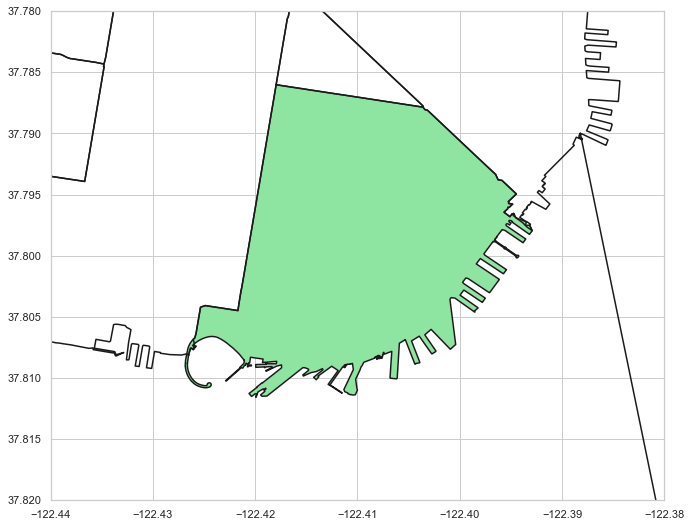

In [47]:
plot_map_fill(dis_id, sf, x_lim, y_lim, color='g')

Will be create a map where several shapes are selected. For that, insteady of having an id as input parameter, we will have a list of ids, and will use a for loop to fill with color each one of them

In [48]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [49]:
def plot_comunas_2(sf, title, comunas, color):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        comuna_id.append(df[df.DISTRICT == i.upper()]
                         .index.get_values()[0])
    plot_map_fill_multiples_ids(title, comuna_id, sf, 
                                       x_lim = None, 
                                       y_lim = None, 
                                       figsize = (11,9), 
                                       color = color);

<Figure size 792x648 with 0 Axes>

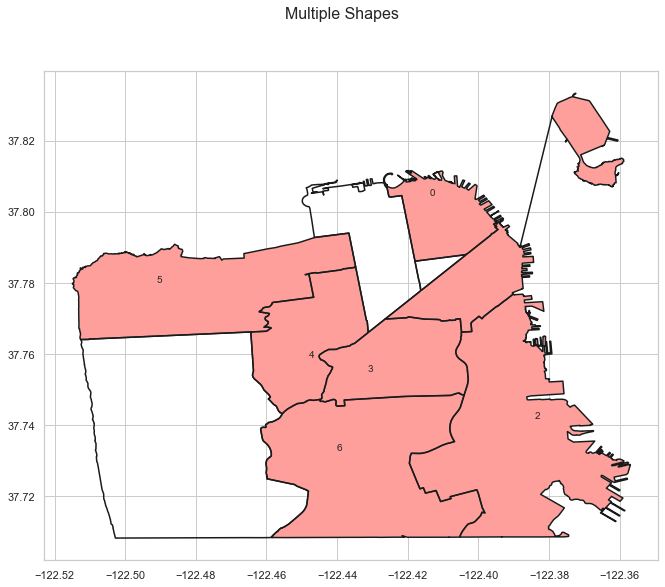

In [50]:
district_ids = [0, 1, 2, 3, 4, 5, 6]
plot_map_fill_multiples_ids("Multiple Shapes", 
                            district_ids, sf, color = 'r')

### Creating 'Heat Maps'

In [51]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq = ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq =['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9:
            color_sq =['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:   
            color_sq =['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [52]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        comuna_id.append(df[df.DISTRICT == 
                            i.upper()].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [53]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

#### Focus on our main goal: determine the districts where you should (and should not) leave your car on Sundays. (Or stated differently, count up the number of thefts.)

Filter the crime dataset by the DayOfWeek category and also choose the appropriate crime category.
Aggregate data by police district.

In [54]:
vehicledata = data[(data.DayOfWeek == 6) & (data.Category == 'VEHICLE THEFT')].groupby(data.PdDistrict).count().IncidntNum

In [55]:
vehicledata.keys()

Index(['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK',
       'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'],
      dtype='object', name='PdDistrict')


1: 357 => 1347 
2: 1348 => 1505 
3: 1506 => 1760 
4: 1761 => 2005 
5: 2006 => 2374 
6: 2375 => 2854 

   1   2   3   4   5   6


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  if sys.path[0] == '':


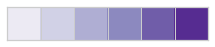

<Figure size 792x648 with 0 Axes>

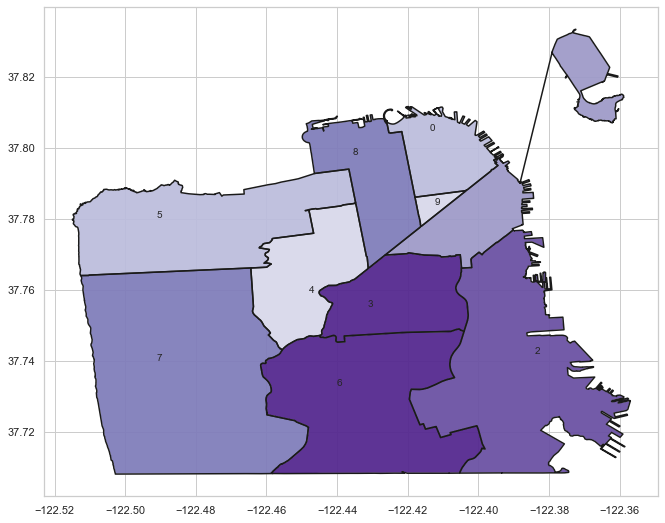

In [56]:
plot_comunas_data(sf,"",vehicledata.keys(),vehicledata,1,True)